In [1]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# read in uWF data, downloaded from watertofood.org 
path = "/home/jburdano/projects/uWF101/"
fil =  "watertofood_uWF-weight_15crops_15countries_1960-2016_5perc.csv"  
df = pd.read_csv(path+fil) #, ";",header=1)
df = df.mask(df==0)    # set zero values to nan-values
df.head(5)

,Unnamed: 0,Years,Item Name,Country Name,Item Category,Weight_t,uWF
0,NaN,1961,Apples,Austria,Fruits,456000.0,67.596703
1,1.0,1961,Apples,France,Fruits,2141999.0,314.213013
2,2.0,1961,Apples,Germany,Fruits,851001.0,147.557999
3,3.0,1961,Apples,Greece,Fruits,196000.0,1032.219971
4,4.0,1961,Apples,Hungary,Fruits,349500.0,793.695984


In [3]:
# bring df in format useable with sns
dftest = pd.pivot_table(df, values=df.iloc[:,7:], index=None, columns=["Item Name","Country Name"])#.xs("1961")
dftest.index.name = "Years"
dfpl = pd.DataFrame(dftest.stack(level=0).stack(level=0))
dfpl.reset_index(level=[0,1,2],inplace=True)
dfpl.columns = ['Years', 'Item Name', 'Country Name', 'uWF']
dfpl["Years"]=dfpl["Years"].astype(int)
display(dfpl.shape)
dfpl.head(5)

(10598, 4)

,Years,Item Name,Country Name,uWF
0,1961,Apples,Austria,67.596703
1,1961,Apples,France,314.213013
2,1961,Apples,Germany,147.557999
3,1961,Apples,Greece,1032.219971
4,1961,Apples,Hungary,793.695984


## Correlation of water content vs. water usage (uWF)

,uWF,water_content
Item Name,,
Apples,446.832742,0.86
Asparagus,1810.027179,0.94
Carrots and turnips,176.014772,0.91
Cherries,1400.217069,0.83
"Chillies and peppers, green",182.170456,0.93
Cucumbers and gherkins,173.623987,0.96
Grapes,779.140670,0.82
Lettuce and chicory,156.075839,0.95
Maize,1604.310036,0.74


,Weight_t,uWF,water_content
Weight_t,1.000000,0.183324,-0.490502
uWF,0.183324,1.000000,-0.830425
water_content,-0.490502,-0.830425,1.000000


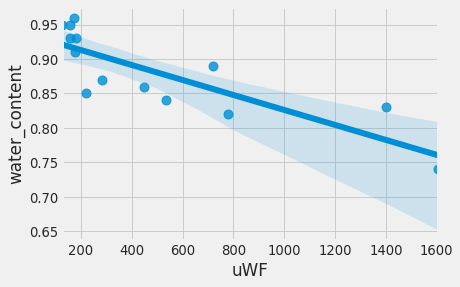

In [83]:
df_item_avg = df.loc[:,["Item Name","Item Category","Weight_t","uWF"]].groupby("Item Name").agg("mean")
df_item_avg

df_item_avg["water_content"] = [.86,.94,.91,.83,.93,.96,.82,.95,.74,.93,.89,.84,.85,.87,.95]
display(df_item_avg.loc[:,["uWF","water_content"]])
df_item_avg.iloc[1,:] = np.nan # "Asparagus"
display(df_item_avg.corr())

plt.style.use("fivethirtyeight")
sns.regplot(x="uWF",y="water_content",data=df_item_avg);

## Start Plotting: Histogram-like panel plot

In [51]:
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)
pal = sns.color_palette("viridis", len(dfpl["Years"].unique()))


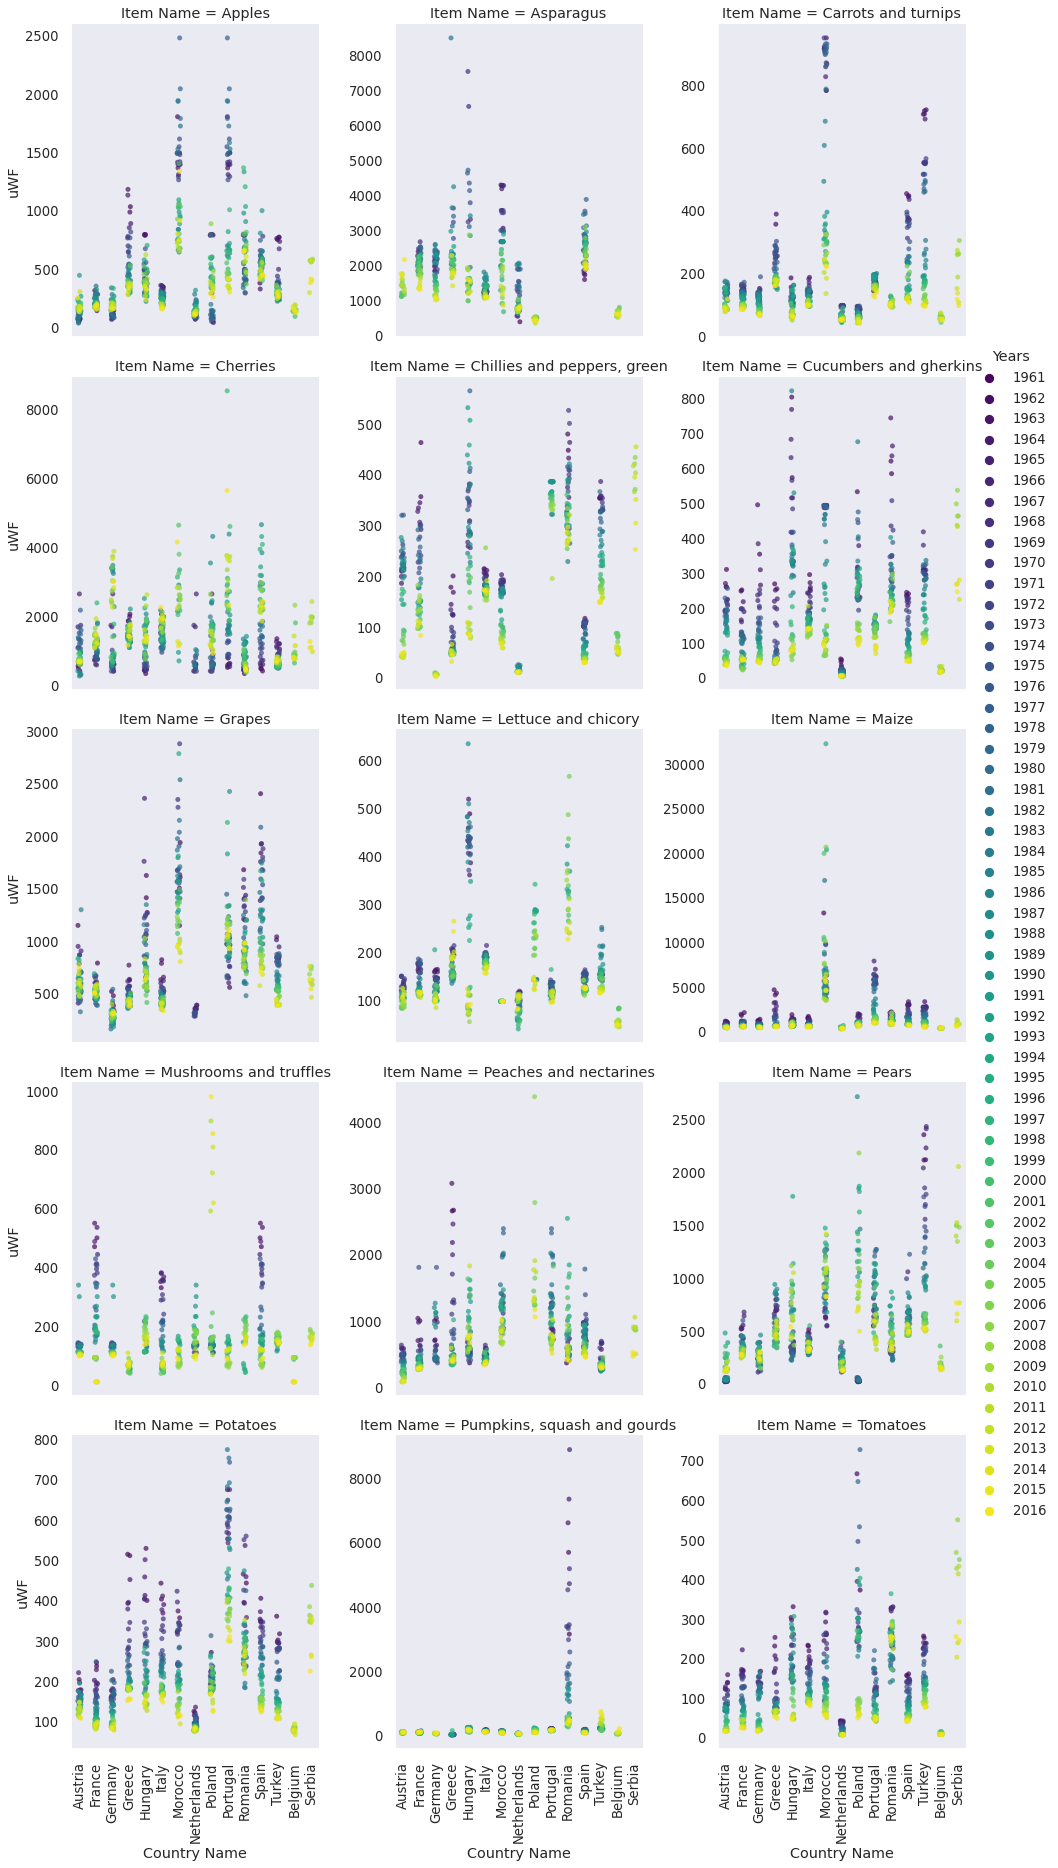

In [71]:
#fig,ax = plt.subplots(5,3,figsize=[80,20])
g=sns.catplot(x="Country Name", y="uWF", hue="Years",
            col="Item Name", col_wrap=3, aspect=.9, sharey=False,
            kind="strip", data=df, alpha = .7, palette=pal); #, palette=pal
# plt.clf()
# plt.colorbar(fig)
# ax.legend_.remove()
g.set_xticklabels(rotation=90);

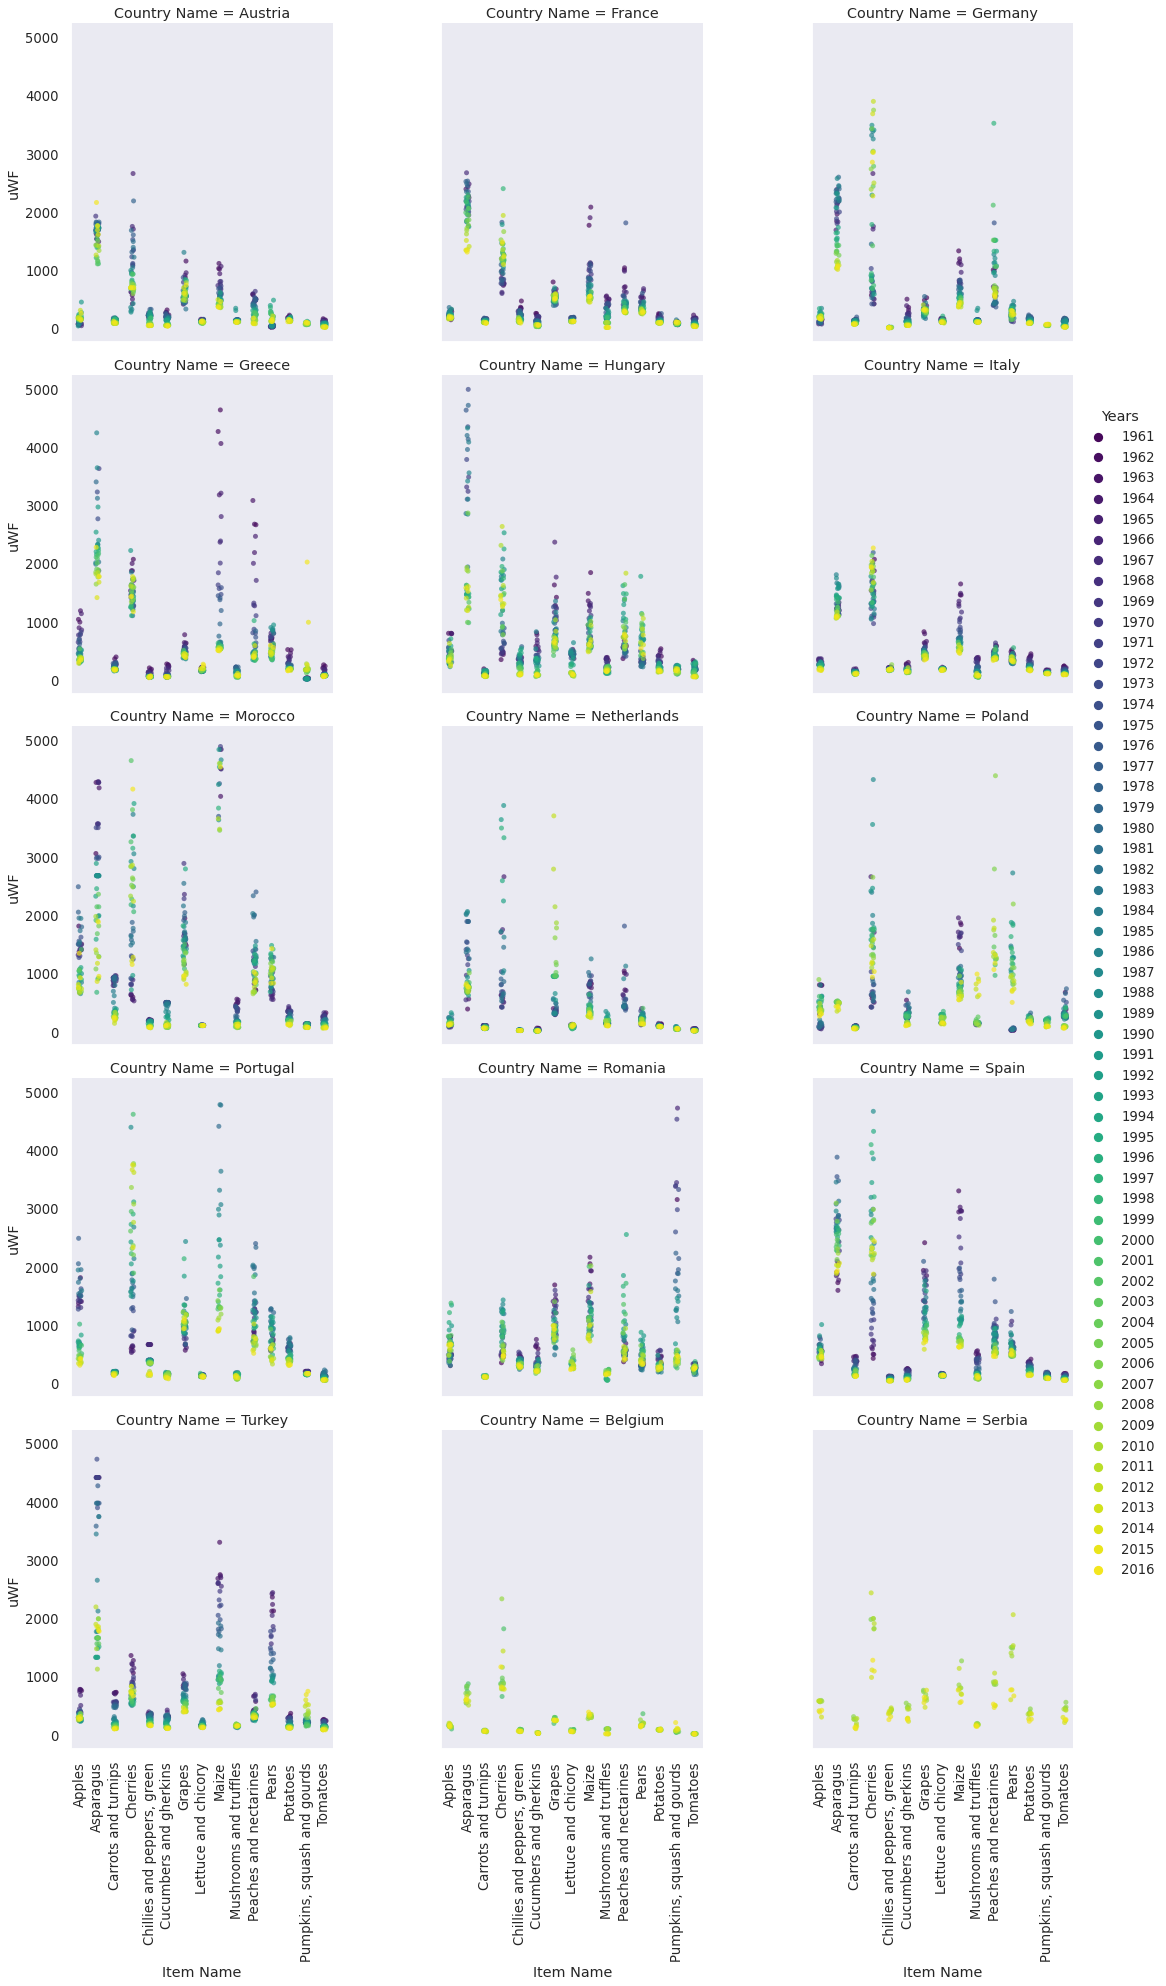

In [68]:
# norm = plt.Normalize(dfpl["Years"].min(), dfpl["Years"].max())
# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# sm.set_array([])

g = sns.catplot(x="Item Name", y="uWF", hue="Years",
            col="Country Name", col_wrap=3, aspect=1.0, sharey=True,
            kind="strip", data=dfpl, palette=pal, alpha = .68); #palette=pal
#g.get_legend().remove()
#g.figure.colorbar(sm)
g.set_xticklabels(rotation=90);

In [69]:
df["Item Category"].unique()

array(['Fruits', 'Vegetables', 'Cereals'], dtype=object)